In [1]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
logreg = LogisticRegression().fit(X_train,y_train)
print("test set score : {:.2f}".format(logreg.score(X_test,y_test)))

test set score : 0.88


#### 교차검증

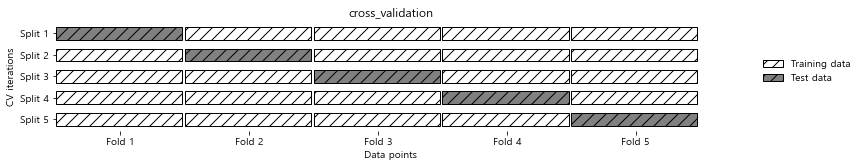

In [4]:
import mglearn
mglearn.plots.plot_cross_validation()

- scikit-learn 에서의 교차검증

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("cross validation score:", scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))

cross validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
cross validation mean score:0.973


In [6]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.04388118, 0.05983448, 0.02393651, 0.03390956, 0.03191185]),
 'score_time': array([0.00199389, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [7]:
import pandas as pd
import numpy as np
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수: \n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.043881,0.001994,0.966667,0.966667
1,0.059834,0.000000,1.000000,0.966667
2,0.023937,0.000000,0.933333,0.983333
3,0.033910,0.000000,0.966667,0.983333
4,0.031912,0.000000,1.000000,0.975000


평균 시간과 점수: 
 fit_time       0.038695
score_time     0.000399
test_score     0.973333
train_score    0.975000
dtype: float64


- 계층별 k-fold cross validation

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블 : \n", iris.target)

iris 레이블 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


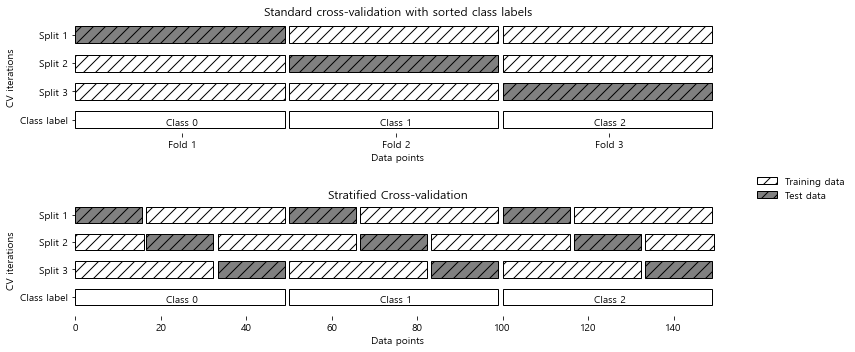

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
from sklearn.model_selection import KFold
Kfold = KFold(n_splits=5)

In [11]:
print("cross validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv=Kfold))

cross validation score:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [12]:
Kfold = KFold(n_splits = 3)
print("cross validation score:\n", cross_val_score(logreg, iris.data, iris.target, cv=Kfold))

cross validation score:
 [0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.98 0.96 0.96]


- LOOCV

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("cross validation fold times: ", len(scores))
print("mean accuracy:{:.2f}".format(scores.mean()))

cross validation fold times:  150
mean accuracy:0.97


- 임의 분할 교차 검증

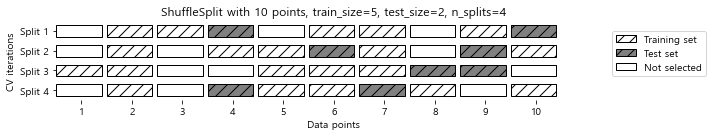

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
# dataset의 50% train set / 50% test set
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("cross validation score:\n", scores)

cross validation score:
 [0.96       0.94666667 0.96       0.94666667 0.94666667 0.96
 0.96       0.97333333 0.97333333 0.94666667]


- 그룹별 교차검증

group 배열에 train/test set을 만들 때 분리되지 않아야 할 그룹을 지정하는 것.

In [17]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12, random_state = 0)
# 처음 3개의 sample은 같은 그룹, 4개의 sample 그룹
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y, groups, cv=GroupKFold(n_splits=3))
print("cross validation score:\n", scores)

cross validation score:
 [0.75       0.6        0.66666667]


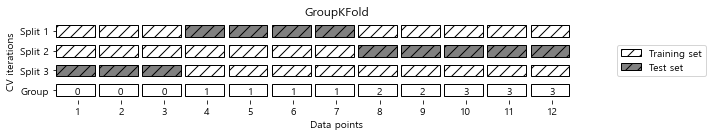

In [18]:
mglearn.plots.plot_group_kfold() 
# 한 그룹 전체가 train set이거나 test set

- 반복 교차 검증

In [19]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [20]:
# 검증 횟수 -> n_repeats x n_splits
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data,iris.target,cv=rskfold)
print("cross validation score:\n", scores)
print("cross validation mean score:{:.3f}".format(scores.mean()))


cross validation score:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
cross validation mean score:0.965


#### Grid Search

관심있는 매개변수들의 가능한 모든 조합을 시도

In [21]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("train set 크기 : {} test set 크기 : {}". format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10 ,100]:
    for C in [0.001, 0.01, 0.1, 1, 10 ,100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma':gamma}

print("best score : {:.2f}".format(best_score))
print("best fit hyperparameter" , best_parameters)
        

train set 크기 : 112 test set 크기 : 38
best score : 0.97
best fit hyperparameter {'C': 100, 'gamma': 0.001}


- hyperparameter overfitting & validation set

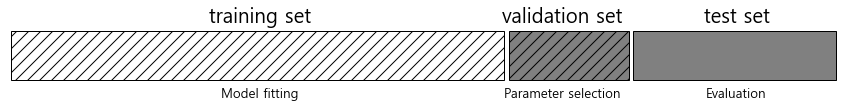

In [22]:
# train / validaiont / test 3개의 set로 나눔
mglearn.plots.plot_threefold_split()

In [23]:
from sklearn.svm import SVC
# 데이터를 train + validation/test set으로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# train + validation set을 train / valid set으로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval,y_trainval, random_state=1)

print('train set 크기 : {} validation set 크기 : {} test set 크기 : {}'
      .format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10 ,100]:
        svm = SVC(gamma = gamma, C= C)
        svm.fit(X_train,y_train)
        score = svm.score(X_valid,y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
            
# train set / valid set 합쳐서 model 만든 후
# test set으로 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test,y_test)

print('validation set best score: {:.2f}'.format(best_score))
print('best hyperparameter', best_parameters)
print('best test score at best parameter : {:.2f}'.format(test_score))

train set 크기 : 84 validation set 크기 : 28 test set 크기 : 38
validation set best score: 0.96
best hyperparameter {'C': 100, 'gamma': 0.01}
best test score at best parameter : 0.97


- Grid Search with Cross Validation

In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
# train set + validation set으로 다시 모델 만듬            
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=10, gamma=0.1)

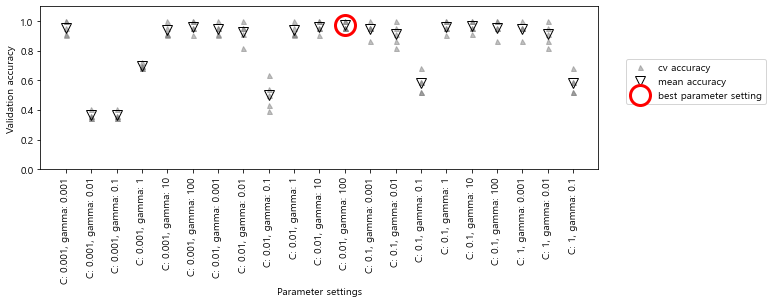

In [25]:
mglearn.plots.plot_cross_val_selection()

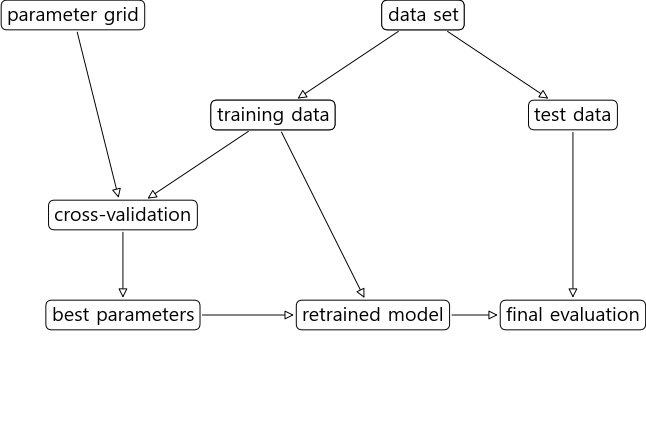

In [26]:
# grid search overview
mglearn.plots.plot_grid_search_overview()

In [27]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
print("parameter grid:\n", param_grid)

parameter grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(),param_grid, cv=5, return_train_score = True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [30]:
grid_search.fit(X_train,y_train)
print("test set score: {:.2f}".format(grid_search.score(X_test,y_test)))

test set score: 0.97


In [31]:
print("Best fit parameter : ", grid_search.best_params_)
print("Best CV score : {:.2f}".format(grid_search.best_score_))

Best fit parameter :  {'C': 10, 'gamma': 0.1}
Best CV score : 0.97


In [32]:
print("Best Score model:\n", grid_search.best_estimator_)

Best Score model:
 SVC(C=10, gamma=0.1)


최적의 hyperparameter에서 전체 train set을 사용하여 학습한 모델은 best_estimator_ 속성에서 얻을 수 있다.

In [33]:
import pandas as pd
pd.set_option("display.max_columns",None) #column 전부 보여주는 옵션

results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.001395,0.000599,0.000998,0.000998,0.000995
std_fit_time,0.000488,0.000489,0.000631,0.000003,0.000004
mean_score_time,0.000599,0.000797,0.000199,0.000598,0.000200
std_score_time,0.000489,0.000399,0.000399,0.000488,0.000399
param_C,0.001000,0.001000,0.001000,0.001000,0.001000
param_gamma,0.001000,0.010000,0.100000,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


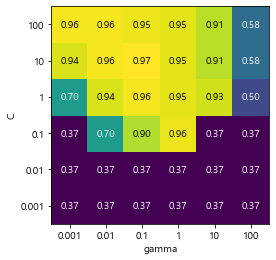

In [37]:
scores = np.array(results.mean_test_score).reshape(6,6)

# CV mean score hit map graph
mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid['gamma'],
                     ylabel='C',yticklabels=param_grid['C'], cmap="viridis")